<a href="https://colab.research.google.com/github/ClaraWongChiaCi/Data-Science-Project/blob/main/P166242_STQD6014_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1.0 Introduction**
The household final consumption expenditure (HFCE) serves as a crucial metric for measuring economic activity and consumer welfare in a country. It reflects the financial state of a nation, encompassing income, purchasing power, consumer confidence, and living standards, by monitoring household expenditure on goods and services over a specific period. HFCE can act as a good indicator for consumer demand in the fast-moving consumer goods (FMCG) sector, as it shows household spending across multiple categories of goods and services, including everyday products and durable goods, which makes it relevant for assessing market size, consumption intensity, and potential growth. This study focuses on the Asia-Pacific (APAC) region, where diverse consumer markets and immense potential growth are expected. The data used in this study was originated from World Bank (2025), extracting between year 2010 to 2024 (latest available year) for APAC countries.

**Link to dataset:** http://bit.ly/4aN9xFL

#**2.0 Problem Statement**
The APAC region is known to be one of the fastest-growing consumer markets globally. However, uneven population size and income levels across countries have led to significantly different purchasing power and consumer behaviour. Thus, this study seeks to address the following questions using the household final consumption expenditure data, centering on the APAC region:

1.	How do consumption levels differ across different market sizes, and what are the factors that explain these differences?
2.	How has consumption behaviour changed in the post-COVID period, and how do recovery patterns differ across developed and developing countries within the APAC region?
3.	Which APAC countries have the highest household consumption growth?
4.	What is the distributional pattern of household consumption expenditure within the market segments?


The analysis aims to clarify where the current consumption scale lies and where future growth is likely to emerge, while providing actionable insights for FMCG companies in market prioritization and long-term regional expansion planning.

**References:**

World Bank.(2025). *World development indicators*. World Bank Group. https://databank.worldbank.org/reports.aspx?source=2&series=NE.CON.PRVT.CD&country=

#**3.0 Data Import**

The dataset employed in this study was stored as a comma-separated values (CSV) file and is imported into the Python environment via pandas library. For exporatory analysis and data visualization, several other libraries are utilized which include NumPy, Matplotlib, and Seaborn.

In [1]:
# Mount to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Import the library
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import seaborn as sns

In [3]:
#Import data file
file_path = "/content/drive/MyDrive/STQD6014_Project_2/Worldbank_APAC_Household_Expenditure_Data.csv"
df = pd.read_csv(file_path)
df.head()

,Series Name,Series Code,Country Name,Country Code,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,Households and NPISHs Final consumption expend...,NE.CON.PRVT.CD,India,IND,916978209675.807,1024686726935.43,1031901615358.22,1070321337241.86,1185297671140.85,1241270296331.75,1360706267075.67,1557082229430.68,1602521651332.49,1727204283214.7,1634284260295.02,1930463468899.9,2056639148049.27,2189937048135.12,2400031587720.89
1,Households and NPISHs Final consumption expend...,NE.CON.PRVT.CD,Bangladesh,BGD,85436063406.0155,95530241860.9667,98299205785.8159,109270901486.57,125468200069.017,141358914056.472,177340893036.799,196542010320.222,217207965277.285,234894700483.893,250383687973.973,286292630441.326,317843355215.864,299958948132.06,315690120945.467
2,Households and NPISHs Final consumption expend...,NE.CON.PRVT.CD,Nepal,NPL,12571048438.3385,18268089188.7697,18009879859.5706,18679790183.6167,18784073147.7487,20356551364.7316,21686945322.1908,22741743147.7328,25544499241.3915,26179605394.342,28489794162.6324,31523897271.7911,35007033398.5618,35364235163.6803,37051405579.0463
3,Households and NPISHs Final consumption expend...,NE.CON.PRVT.CD,Sri Lanka,LKA,..,..,..,..,..,54410778816.938,54736251063.2803,55783752949.2982,56907048766.8091,55799694426.4462,53051130876.4437,54197973226.8483,51204425839.3327,59267204131.3167,67994062219.898
4,Households and NPISHs Final consumption expend...,NE.CON.PRVT.CD,Bhutan,BTN,719168669.984472,743462359.183164,645992287.811759,734857075.375383,938348163.808088,1115829744.7697,1122982608.92095,1232001884.04552,1261955343.21097,1313275972.35009,1334802408.49451,1443214889.98899,1674519939.3251,1788433835.66703,..


#**3.1 Data Cleaning and Reshaping**
Data cleaning process was performed following data import, whereby only relevant variables are retained. Columns such as "Series Name", "Series Code", and "Country Code" which are not required for analysis, are removed from the dataset. This ensures dataset emphasizes only on household final consumption expenditures (HFCE) categorized by country and year.

The dataset is originally structured in wide format, as shown below, and is reshaped into long format. Stacking of the annual HFCE values was performed by using "Country Name" as the primary identifier. The resulting dataset comprised of three main fields, including "Country Name", "Year", and "HFCE_USD".

In [4]:
#Extraction of necessary columns
df2 = df.drop(columns=["Series Name", "Series Code", "Country Code"])
df2.head()

,Country Name,2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,India,916978209675.807,1024686726935.43,1031901615358.22,1070321337241.86,1185297671140.85,1241270296331.75,1360706267075.67,1557082229430.68,1602521651332.49,1727204283214.7,1634284260295.02,1930463468899.9,2056639148049.27,2189937048135.12,2400031587720.89
1,Bangladesh,85436063406.0155,95530241860.9667,98299205785.8159,109270901486.57,125468200069.017,141358914056.472,177340893036.799,196542010320.222,217207965277.285,234894700483.893,250383687973.973,286292630441.326,317843355215.864,299958948132.06,315690120945.467
2,Nepal,12571048438.3385,18268089188.7697,18009879859.5706,18679790183.6167,18784073147.7487,20356551364.7316,21686945322.1908,22741743147.7328,25544499241.3915,26179605394.342,28489794162.6324,31523897271.7911,35007033398.5618,35364235163.6803,37051405579.0463
3,Sri Lanka,..,..,..,..,..,54410778816.938,54736251063.2803,55783752949.2982,56907048766.8091,55799694426.4462,53051130876.4437,54197973226.8483,51204425839.3327,59267204131.3167,67994062219.898
4,Bhutan,719168669.984472,743462359.183164,645992287.811759,734857075.375383,938348163.808088,1115829744.7697,1122982608.92095,1232001884.04552,1261955343.21097,1313275972.35009,1334802408.49451,1443214889.98899,1674519939.3251,1788433835.66703,..


In [5]:
#Stacking of columns
df_long = df2.set_index(["Country Name"]).stack().reset_index()
df_long.columns = ["Country Name", "Year", "HFCE_USD"]
df_long.head()

,Country Name,Year,HFCE_USD
0,India,2010 [YR2010],916978209675.807
1,India,2011 [YR2011],1024686726935.43
2,India,2012 [YR2012],1031901615358.22
3,India,2013 [YR2013],1070321337241.86
4,India,2014 [YR2014],1185297671140.85


#**3.2 Data Structure Validation and Conversion**
An assessment of data structure was conducted to validate data types within the dataset. Both "Year" and "HFCE_USD" variables are categorized as object form or character string and needs to be converted into numerical format to allow subsequent analysis.

The "Year" variable was originally recorded as "YYYY [YRYYYY]" (eg. 2010[YR2010]) which are not helpful for chronological sorting and numerical computations. The year information was extracted by including only the first 4 characters (character 0,1,2,3) and converted into interger format.

HFCE values were also converted into numerical format. Any missing values or non-numeric entities were coerced into null values (NaN) to allow subsequent handling of missing values and maintain data integrity.

In [6]:
#Data Structure
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Name  645 non-null    object
 1   Year          645 non-null    object
 2   HFCE_USD      645 non-null    object
dtypes: object(3)
memory usage: 15.2+ KB


In [7]:
#Converting Year from object to interger form
df_long["Year"] = df_long["Year"].str[:4].astype(int)
df_long.head()

,Country Name,Year,HFCE_USD
0,India,2010,916978209675.807
1,India,2011,1024686726935.43
2,India,2012,1031901615358.22
3,India,2013,1070321337241.86
4,India,2014,1185297671140.85


In [8]:
#Convert HFCE_USD to numeric form
df_long["HFCE_USD"] = pd.to_numeric(df_long["HFCE_USD"], errors="coerce")
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  645 non-null    object 
 1   Year          645 non-null    int64  
 2   HFCE_USD      507 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 15.2+ KB


#**3.3 Handling of Missing Values**
The dataset was then assessed for the presence of missing values to examine data completeness. A systematic check was conducted for all variables to identify null values, with particular emphasis on HFCE values, which act as the metric of interest in this study.

Missing observations were excluded from further analysis. Data exclusion instead of imputation was performed to preserve the integrity of cross-country and temporal comparisons while reducing data loss. The missing values in the HFCE dataset are more likely caused by data unavailability or reporting gaps rather than random errors. Imputation may introduce bias and disrupt true expenditure patterns that eventually distort trend interpretations.

In [9]:
#Identify presence of missing values
df_long.isna().sum()

,0
Country Name,0
Year,0
HFCE_USD,138


In [10]:
#Exclude any rows that consists of missing values
df_apac = df_long.dropna(subset=["HFCE_USD"])
df_apac.isna().sum()

,0
Country Name,0
Year,0
HFCE_USD,0


#**3.4 Scaling of HFCE values**
The HFCE values were rescaled from USD to billion USD to enhance data interpretability and expedite cross-country and temporal comparisons. The transformation was conducted by dividing the original HFCE values by one billion (10^9).

In [11]:
#Scaling of households expenditure to billion USD
df_apac["HFCE_Billion_USD"] = df_apac["HFCE_USD"] / 1000000000
df_apac.head(20)

/tmp/ipython-input-1816824150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_apac["HFCE_Billion_USD"] = df_apac["HFCE_USD"] / 1000000000


,Country Name,Year,HFCE_USD,HFCE_Billion_USD
0,India,2010,9.169782e+11,916.978210
1,India,2011,1.024687e+12,1024.686727
2,India,2012,1.031902e+12,1031.901615
3,India,2013,1.070321e+12,1070.321337
4,India,2014,1.185298e+12,1185.297671
5,India,2015,1.241270e+12,1241.270296
6,India,2016,1.360706e+12,1360.706267
7,India,2017,1.557082e+12,1557.082229
8,India,2018,1.602522e+12,1602.521651
9,India,2019,1.727204e+12,1727.204283


#**3.5 Market Segmentation and Visualization**
To facilitate comparisons and visualization, countries were ranked based on their average HFCE values over the available study period. The countries are then segmented into three categories: large, medium, and small market groups, based on the ranking.

In [12]:
#Sort countries by descending avg HFCE
avg_h = (
    df_apac.groupby("Country Name", as_index=False)
    .agg(Mean_HFCE_Billion_USD=("HFCE_Billion_USD", "mean"))
    .sort_values(by = "Mean_HFCE_Billion_USD", ascending=False)
)

#Splitting into three regions based on economics
large_markets = avg_h.iloc[:5]["Country Name"].tolist()
medium_markets = avg_h.iloc[5:10]["Country Name"].tolist()
small_markets = avg_h.iloc[10:15]["Country Name"].tolist()

#Filtering into dataframes
df_large = df_apac[df_apac["Country Name"].isin(large_markets)]
df_medium = df_apac[df_apac["Country Name"].isin(medium_markets)]
df_small = df_apac[df_apac["Country Name"].isin(small_markets)]

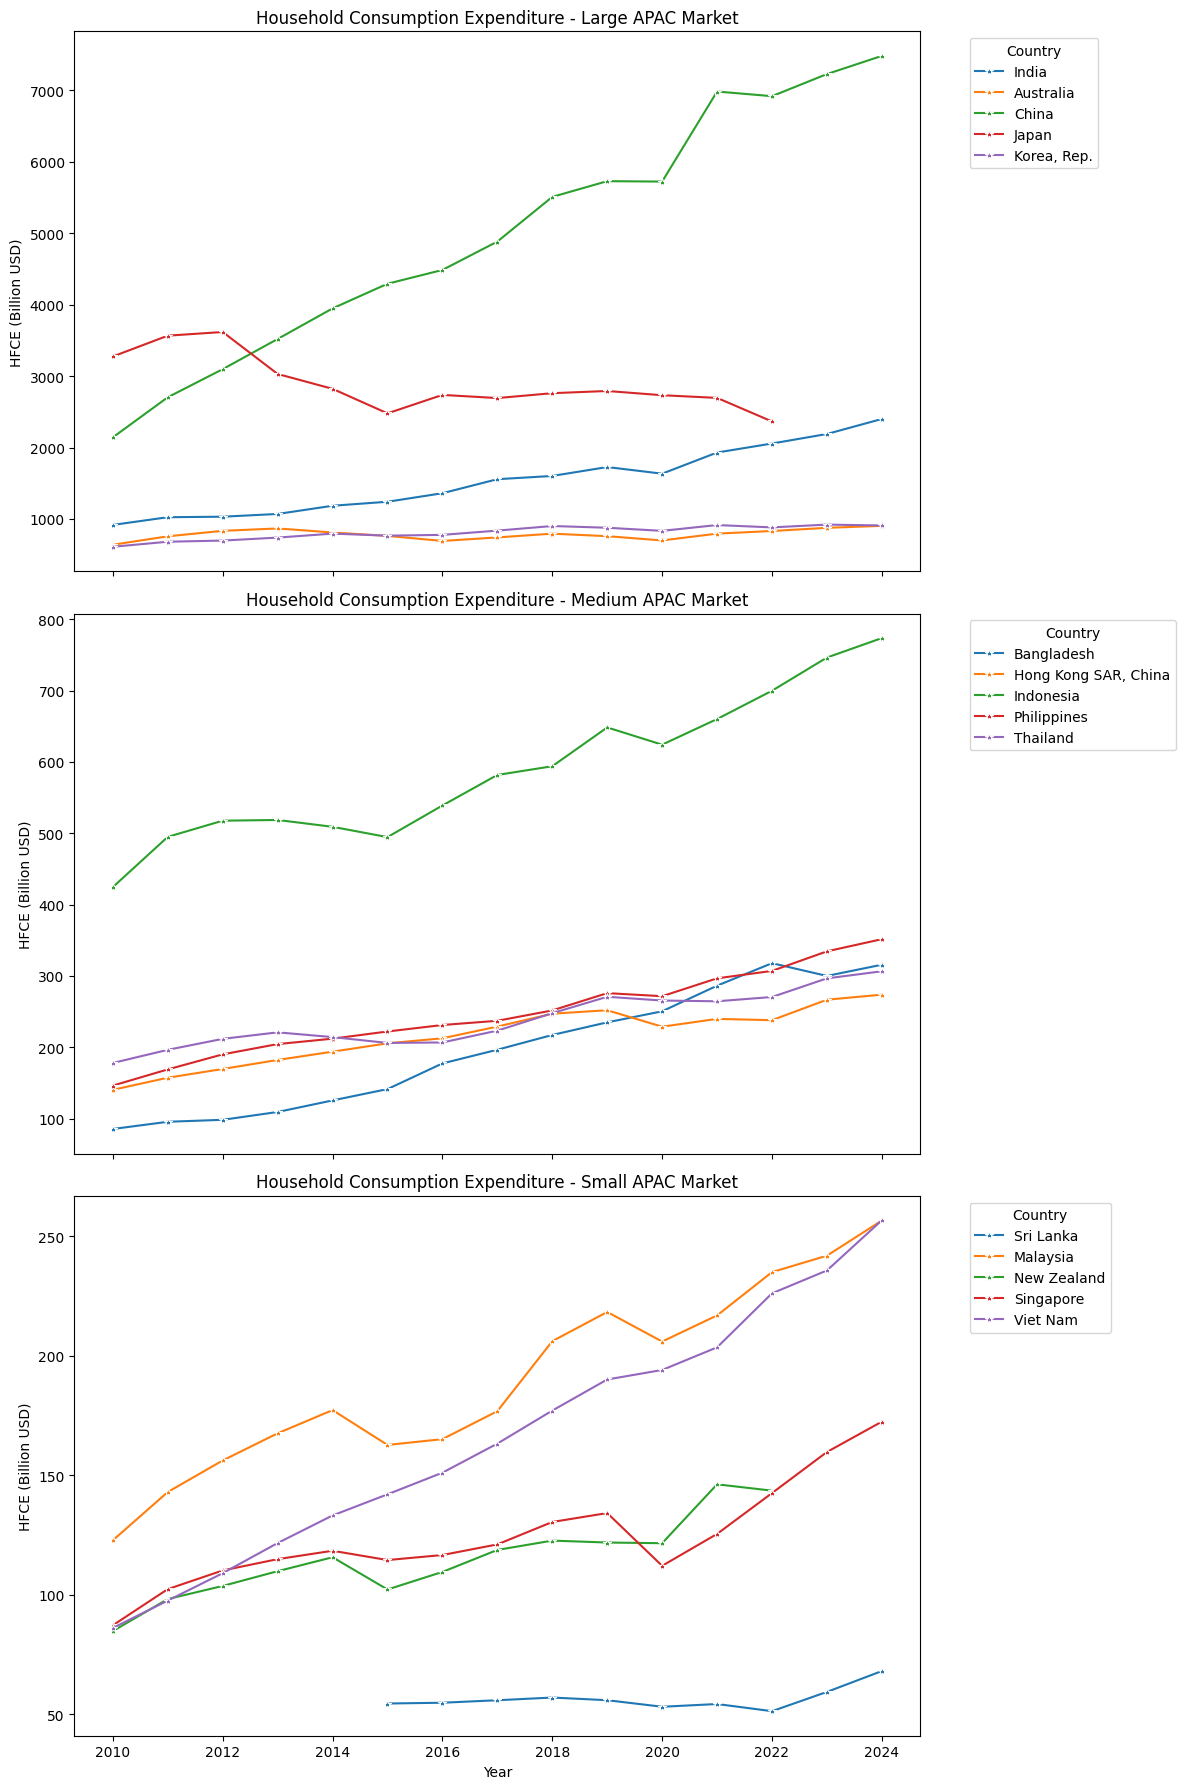

In [13]:
#plot based on market sizes
fig, ax = plt.subplots(3,1, figsize=(12,18), sharex=True)

#Plot 1: Large Markets
sns.lineplot(data=df_large, x="Year", y="HFCE_Billion_USD", hue="Country Name", marker="*", ax=ax[0])
ax[0].set_title("Household Consumption Expenditure - Large APAC Market")
ax[0].set_ylabel("HFCE (Billion USD)")
ax[0].legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")

#Plot 2: Medium Markets
sns.lineplot(data=df_medium, x="Year", y="HFCE_Billion_USD", hue="Country Name", marker="*", ax=ax[1])
ax[1].set_title("Household Consumption Expenditure - Medium APAC Market")
ax[1].set_ylabel("HFCE (Billion USD)")
ax[1].legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")

#Plot 3: Small Markets
sns.lineplot(data=df_small, x="Year", y="HFCE_Billion_USD", hue="Country Name", marker="*", ax=ax[2])
ax[2].set_title("Household Consumption Expenditure - Small APAC Market")
ax[2].set_ylabel("HFCE (Billion USD)")
ax[2].legend(title="Country", bbox_to_anchor=(1.05,1), loc="upper left")

plt.tight_layout()
plt.show()

###**Temporal Patterns of Household Consumption Expenditure**
The plots above show a clear divergence in household consumption levels across market tiers. Large APAC economies exhibit substantially higher household final consumption expenditure (HFCE) throughout the study period, with an overall increasing trend over time. China showed significantly higher consumption levels compared to other nations within the large market segment. This suggests that the population is not the only driver of the consumption gap, with China and India having comparable population sizes (Worldometer, 2025). The higher per capita income of China has shaped a greater purchasing power, thus a higher per capita consumption expenditure. Policy initiatives such as stabilizing employment and raising household income were emphasized to strengthen household spending capacity (Xinhua, 2025). The reported growth in disposable income and consumption expenditure, especially among urban households, further reinforces the correlation between income growth and household consumption (National Bureau of Statistics of China, 2025). Besides, rapid urbanization in China have further boosts consumption intensity, promoted by the change in lifestyle. Official statistics showed that a raise in urbanization rate to 66% by the end of 2023 in China, indicating rapid structural shifts from rural to urban living, which generally corresponds to greater access to consumer goods and services and therefore, higher spending (Xinhua, 2024). Japan despite ranked as the second highest nation, a declining trend of expenditure is observed mainly due to aging population and inflation (Fujioka, 2025). Wolf (2025) reported that persistent inflation in Japan which had outweighed wage growth, restrained Japan’s household expenditure growth, thus eroding purchasing power. Australia and Korea exhibit a relatively stable trend, which is a typical phenomenon in mature economies.

Whilst in medium-sized markets, a steady and moderate growth is observed, with Hong Kong, Philippines, Thailand, and Bangladesh staying within a similar range. Indonesia consistently records the highest household consumption expenditure within the medium market segment with a strong and sustained upward trend. Three distinct consumption groups are observed in the small market segments: (i) Malaysia and Vietnam, recorded relatively high household consumption levels; (ii) Singapore and New Zealand, demonstrating moderate consumption levels; and (iii) Sri Lanka at substantially lower levels. As one of the highest-income nations, the elevated HFCE reported for Singapore and New Zealand is driven mainly by high per capita income rather than population size. This is supported by lower consumption levels in more populous but lower-income countries such as Sri Lanka. The consumption growth of Malaysia is primarily supported by its larger population compared to other nations within the small market segment, with approximately six times Singapore’s population. A noticeable dip or economic slowdown is observed around the year 2020 across almost all countries, which might suggest an influence of the COVID-19 pandemic on household spending.

**References:**

Fujioka, T. (2025, June 5). *Japan’s Household Spending Falls as Inflation Stays Elevated.* Bloomberg.com. https://www.bloomberg.com/news/articles/2025-06-05/japan-s-household-spending-declines-as-inflation-stays-elevated

National Bureau of Statistics of China. (2025, July 16). *Households’ Income and Consumption Expenditure in the First Half of 2025.* https://www.stats.gov.cn/english/PressRelease/202507/t20250730_1960541.html

Wolf, M. (2025, October 28). *Japan economic outlook, October 2025.* Deloitte Insights; Deloitte. https://www.deloitte.com/us/en/insights/topics/economy/asia-pacific/japan-economic-outlook.html

Worldometer. (2025). *Countries in the World by Population (2025)*. WorldoMeters. https://www.worldometers.info/world-population/population-by-country/

Xinhua. (2024, September 23). *China sees rising urbanization rate over past 75 years.* Www.gov.cn. https://english.www.gov.cn/archive/statistics/202409/23/content_WS66f14531c6d0868f4e8eb2c0.html

Xinhua. (2025, March 8). *How China powers up consumer spending to fuel growth.*Www.gov.cn. https://english.www.gov.cn/news/202503/08/content_WS67cb9570c6d0868f4e8f099f.html



#**3.6 Market Share Analysis of APAC HFCE**
The HFCE was analyzed for the most recent year in the dataset to evaluate the relative contribution of major APAC countries. Large and medium markets were classified as major APAC economies to capture economies with great impact on regional consumption. Market share of each countries was calculated as the proportion of its HFCE value to the total HFCE values within the major market.

In [14]:
#Filter to latest yr
latest_yr = df_apac["Year"].max()
df_latest = df_apac[df_apac["Year"]==latest_yr]

major_markets = large_markets + medium_markets

df_latest_major = df_latest[df_latest["Country Name"].isin(major_markets)].copy()
df_latest_major["Market_Share"] = (df_latest_major["HFCE_Billion_USD"] / df_latest_major["HFCE_Billion_USD"].sum()) * 100

#Filter to only include large APAC Countries
df_top = df_latest_major.sort_values(by="Market_Share", ascending=False).head(10)

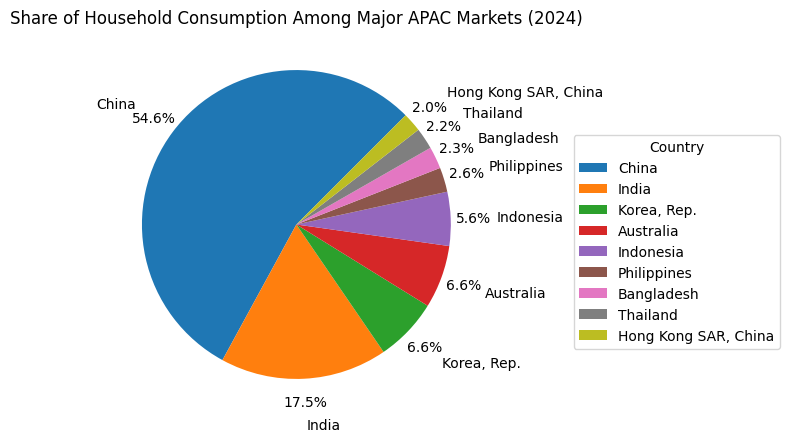

In [15]:
#pie chart
plt.figure()
wedges, texts, autotexts = plt.pie(df_top["Market_Share"], labels=df_top["Country Name"],
                                   autopct="%1.1f%%", startangle=45,
                                   pctdistance=1.15, labeldistance=1.30)
plt.legend(wedges, df_top["Country Name"], title="Country", bbox_to_anchor=(1.2,0.75), loc="upper left")
plt.title("Share of Household Consumption Among Major APAC Markets (2024)")
plt.tight_layout()
plt.show()

###**Market Share of HFCE Across Major APAC Economies**
The HFCE market share in the APAC region shows a highly uneven distribution, which might suggest that regional consumption relies greatly on a small number of economies. China accounts for the largest share of regional household consumption, alone contributing over half of the total consumption (54.6%). India follows as the second largest (17.5%), while the remaining economies in the APAC region each account for less than 7% of total consumption. China and India together contributed to more than two-thirds of the total household spending in major countries, mainly attributed to the large population with rising household incomes. The Chinese government had shifted their strategies to encourage domestic consumption rather than depending solely on exports and investments for sustainable economic growth. Consumer confidence and willingness to spend also drive India’s position as the second largest market, in addition to its large population (Harper & Das, 2025). Recent reports have supported the idea of India as one of the most optimistic consumer markets globally, with an expectation of increased spending in approximately 60% of Indian households (Ani, 2026).

Despite having significantly smaller populations than Indonesia, Australia and Korea each contributed approximately 6.6%, while Indonesia accounted for only 5.6%, despite its population ranking fourth globally. This shows that population size alone does not translate into a higher share of consumption; disposable income also plays a role. Australian and Korean households generally have higher average incomes and thus stronger household purchasing power. Japan was excluded from the consumption share analysis due to the unavailability of HFCE data for the latest year. Data interpolation was not used to estimate Japan’s HFCE for 2024 to ensure data accuracy and avoid misrepresentation of actual consumption levels.

**References:**

Ani. (2026, Jan 1). *India emerging as most optimistic consumer market for 2026; 60% households expect higher spending in next 6 months: Report. *The Tribune. https://www.tribuneindia.com/news/business/india-emerging-as-most-optimistic-consumer-market-for-2026-60-households-expect-higher-spending-in-next-6-months-report/

Harper, A. & Das, R. (2025, December 18). *Asia–Pacific consumer sentiment: Stability, selectivity, and spending shifts.* McKinsey & Company. https://www.mckinsey.com/industries/consumer-packaged-goods/our-insights/an-update-on-consumer-sentiment-in-asia-pacific

#**3.7 Pre- and Post-COVID Household Consumption**
The HFCE values are segregated into pre-COVID and post-COVID taking year 2020 as the breakpoint. The main objective is to assess the structural changes in consumption trend across APAC economies. The average HFCE values for each country were computed by aggregating entries of the same country within the same period. This allows direct comparison of consumption levels before and after the pandemic. The analysis emphasised only on the top 15 APAC economies that were previously ranked by their respective average HFCE values.

In [16]:
#Segregate data into pre- and post-COVID period
df_covid = df_apac.copy()
df_covid["Period"] = df_covid["Year"].apply(lambda x: "Pre-COVID" if x < 2020 else "Post-COVID")
df_covid

,Country Name,Year,HFCE_USD,HFCE_Billion_USD,Period
0,India,2010,9.169782e+11,916.978210,Pre-COVID
1,India,2011,1.024687e+12,1024.686727,Pre-COVID
2,India,2012,1.031902e+12,1031.901615,Pre-COVID
3,India,2013,1.070321e+12,1070.321337,Pre-COVID
4,India,2014,1.185298e+12,1185.297671,Pre-COVID
...,...,...,...,...,...
640,Viet Nam,2020,1.939907e+11,193.990716,Post-COVID
641,Viet Nam,2021,2.034632e+11,203.463215,Post-COVID
642,Viet Nam,2022,2.260688e+11,226.068834,Post-COVID
643,Viet Nam,2023,2.356373e+11,235.637302,Post-COVID


In [17]:
#Aggregate (Mean Consumption per Period)
df_covid_avg = df_covid.groupby(["Country Name","Period"], as_index=False)["HFCE_Billion_USD"].agg(Mean_HFCE_Billion_USD="mean")
df_covid_avg

,Country Name,Period,Mean_HFCE_Billion_USD
0,American Samoa,Post-COVID,0.585333
1,American Samoa,Pre-COVID,0.453100
2,Australia,Post-COVID,821.292401
3,Australia,Pre-COVID,766.085913
4,Bangladesh,Post-COVID,294.033749
...,...,...,...
66,Tonga,Pre-COVID,0.423589
67,Vanuatu,Post-COVID,0.718071
68,Vanuatu,Pre-COVID,0.506869
69,Viet Nam,Post-COVID,223.161302


In [18]:
#Filter to only Top 15 Countries
top15_countries = avg_h.head(15)["Country Name"].tolist()
df_covid_avg2 = df_covid_avg[df_covid_avg["Country Name"].isin(top15_countries)]
df_covid_avg2

,Country Name,Period,Mean_HFCE_Billion_USD
2,Australia,Post-COVID,821.292401
3,Australia,Pre-COVID,766.085913
4,Bangladesh,Post-COVID,294.033749
5,Bangladesh,Pre-COVID,148.134910
12,China,Post-COVID,6868.247273
13,China,Pre-COVID,4031.601477
18,"Hong Kong SAR, China",Post-COVID,249.377358
19,"Hong Kong SAR, China",Pre-COVID,198.913237
20,India,Post-COVID,2042.271103
21,India,Pre-COVID,1271.797029


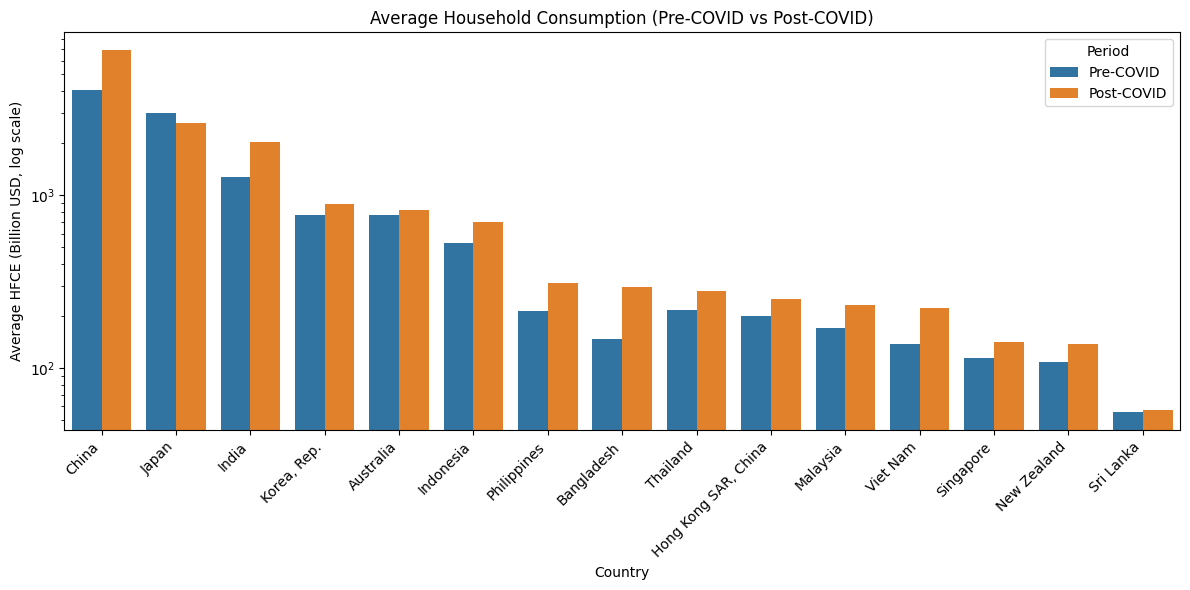

In [19]:
#Bar chart
order = df_covid_avg2[df_covid_avg2["Period"]=="Post-COVID"].sort_values("Mean_HFCE_Billion_USD", ascending = False)["Country Name"]
plt.figure(figsize=(12,6))
sns.barplot(data=df_covid_avg2, x="Country Name", y="Mean_HFCE_Billion_USD",
            hue="Period", hue_order=["Pre-COVID", "Post-COVID"], order=order, dodge=True)
plt.yscale("log")
plt.title("Average Household Consumption (Pre-COVID vs Post-COVID)")
plt.xlabel("Country")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Average HFCE (Billion USD, log scale)")
plt.legend(title="Period")
plt.tight_layout()
plt.show()

###**Pre- and Post-COVID Household Consumption and Recovery**
The figure above compares the average HFCE before and after the COVID-19 period across the top 15 economies in the APAC region. Results showed that most countries demonstrated an increase in the average HFCE in the post-COVID period, suggesting recovery and a shift in consumer behaviour. Japan, exceptionally, displayed a slight decline in average HFCE, but this reduction may be attributed to the incomplete reporting for the most recent two years, which can affect the post-COVID average. However, the observation may be supported by the evidence that the post-COVID economic growth in Japan remained modest or stagnated, with domestic demand and private consumption staying low (Tsigaris et al., 2024). Notably, Bangladesh exhibited the most prominent increase, reflecting a strong recovery in domestic demand.  This is characterised by a rebound in economic activity, particularly in manufacturing and service sectors which drives growth and positive expansion in GDP (Chung & Mahbub, 2022). Conversely, developed countries like Australia and Korea showed only modest increases between pre- and post-COVID periods. Australia and Korea were both reported to experience milder economic disruptions during the COVID pandemic compared to other advanced countries (Dyvik, 2025; Karp, 2021). Korea’s approach in dealing with the pandemic restricted economic contraction in 2020 and thus resulting in a stable yet less pronounced recovery pattern (O’Neil, 2020).

**References:**

Chung, D. & Mahbub, M.A. (2022, April 13) *Bangladesh Economy Shows Resilience Amid Global Uncertainty.* World Bank. https://www.worldbank.org/en/news/press-release/2022/04/13/bangladesh-economy-shows-resilience-amid-global-uncertainty

Dyvik, E.H. (2025, December 17). E*conomic impact of the coronavirus (COVID-19) in South Korea.* Statista. https://www.statista.com/topics/9308/economic-impact-of-the-coronavirus-covid-19-in-south-korea/?srsltid=AfmBOooJbRyDEwEmn_admfFdgFvz7IRGl_i8bFmYFGZcQHTmqBOpmysT

Karp, P. (2021, September 14). *Australian economy survived Covid better than most but recovery could slow, OECD says.* The Guardian. https://www.theguardian.com/business/2021/sep/15/australian-economy-survived-covid-better-than-most-but-recovery-could-slow-oecd-says

O’Neill, J. (2020, August 24). *How South Korea became a model for dealing with COVID-19. *World Economic Forum. https://www.weforum.org/stories/2020/08/south-korea-covid19-government-pandemic-response/

Tsigaris, P., Teixeira da Silva, J. A., & Honma, M. (2024). Long-term economic outlook for Japan, as impacted by COVID-19. *Open Health*, 5(1). https://doi.org/10.1515/ohe-2023-0042

#**3.8 Distribution Analysis by Market Tier**
Similar to previous analysis in section 3.5, countries are segmented into three market tiers, namely large, medium, and small markets based on respective average HFCE. A dataframe was created with market tier labels assigned to countries fulfilling the predefined requirements, and only countries with the specified market tiers were retained for analysis.

The objectives of this analysis is to examine the distribution and variability of consumption levels across market tiers. Logarithmic scaling was applied to the HFCE axis in the boxplot to resolve the significant differences in consumption magnitude across APAC markets. This is to prevent visual compression of the plot for smaller markets that leads to difficult interpretation.

In [20]:
#Assigning of labels
df_box = df_apac.copy()
df_box["Market_Tier"] = None

df_box.loc[df_box["Country Name"].isin(large_markets), "Market_Tier"] = "Large markets"
df_box.loc[df_box["Country Name"].isin(medium_markets), "Market_Tier"] = "Medium markets"
df_box.loc[df_box["Country Name"].isin(small_markets), "Market_Tier"] = "Small markets"
df_box = df_box.dropna(subset=["Market_Tier"])

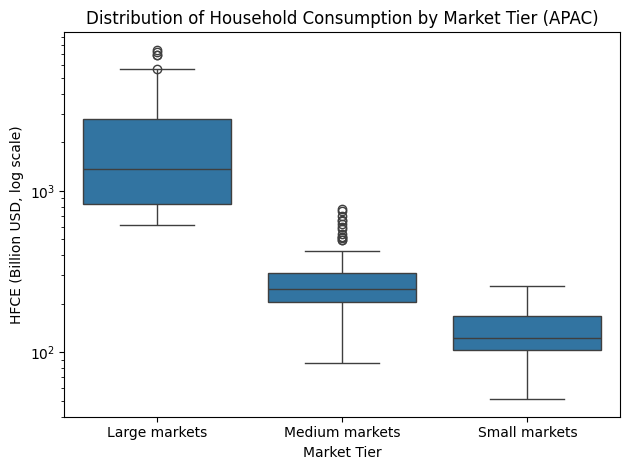

In [21]:
#boxplot
plt.figure()
sns.boxplot(data=df_box, x="Market_Tier", y="HFCE_Billion_USD",
            order=["Large markets", "Medium markets", "Small markets"])
plt.yscale("log")
plt.title("Distribution of Household Consumption by Market Tier (APAC)")
plt.xlabel("Market Tier")
plt.ylabel("HFCE (Billion USD, log scale)")
plt.tight_layout()
plt.show()

###**HFCE Distribution Across Market Segment**
The boxplot reveals a distinct distributional pattern of HFCE across three market segments, with outliers identified particularly in large and medium market groups, which reflects the structural differences between countries of the same market group. These outliers appear above the third quartile of the plot, indicating exceptionally high consumption levels compared to others within the same market segment. The wider interquartile range (IQR) of large market segment suggests greater variation in consumption levels while medium market segment have comparatively tighter distribution. However, the large market segment consists of fewer outliers compared to the medium market segment. The outliers in large market group are likely attributed by countries such as China, often with strong domestic demand and large population. Whereas the outliers in medium market segment are most likely associated with Indonesia, which higher HFCE values are consistently reported compared to its segment peers. Whilst the small market segment displays noticeable skewness, indicating non-normal distribution of HFCE within this group. The displaced median suggests that most countries remain concentrated at a lower consumption level, while only a few higher consumption economies such as Malaysia and Singapore. Overall, reinforces that household consumption in the APAC region is highly unequal with small number of economies responsible for disproportionately high levels of spending, possibly due to income and wealth inequality often reported in APAC regions (United Nations, 2018).

**References:**

United Nations. (2018). Inequality of outcomes in Asia and the Pacific: Trends, drivers and costs. In *Inequality in Asia and the Pacific in the Era of the 2030 Agenda for Sustainable Development* (pp. 8–23). https://doi.org/10.18356/9f9d5d8d-en

# **3.9 Overall HFCE Growth Rate**
An overall growth rate was calculated for each country by the percentage change between the first and final HFCE values available relating to the starting value. Similar to previous analysis, only the top 15 APAC countries that represent economic significance were included. The comparison of growth rate between countries was visualised via a bar chart. This approach provides vision of long-term consumption expansion relevant to FMCG market growth.

In [22]:
#Growth Rate of Household Consumption
df_growth = df_apac.copy()
df_growth = df_growth.sort_values(by=["Country Name", "Year"])

#Calculate growth rate (%)
df_growth_all = df_growth.groupby("Country Name").agg(
    start_year=("Year", "first"),
    end_year=("Year", "last"),
    start_HFCE=("HFCE_Billion_USD", "first"),
    end_HFCE=("HFCE_Billion_USD", "last")
).reset_index()

df_growth_all["Overall_Growth_%"] = ((df_growth_all["end_HFCE"] - df_growth_all["start_HFCE"])/ df_growth_all["start_HFCE"]) * 100

#Filter to the same 15 countries above
df_growthtop = df_growth_all[df_growth_all["Country Name"].isin(top15_countries)]

#For checking purpose
df_growthtop[["Country Name", "Overall_Growth_%"]]

,Country Name,Overall_Growth_%
1,Australia,41.391655
2,Bangladesh,269.504526
6,China,249.250657
9,"Hong Kong SAR, China",95.061153
10,India,161.732674
11,Indonesia,82.229989
12,Japan,-27.772384
14,"Korea, Rep.",48.886378
17,Malaysia,109.079007
23,New Zealand,69.354223


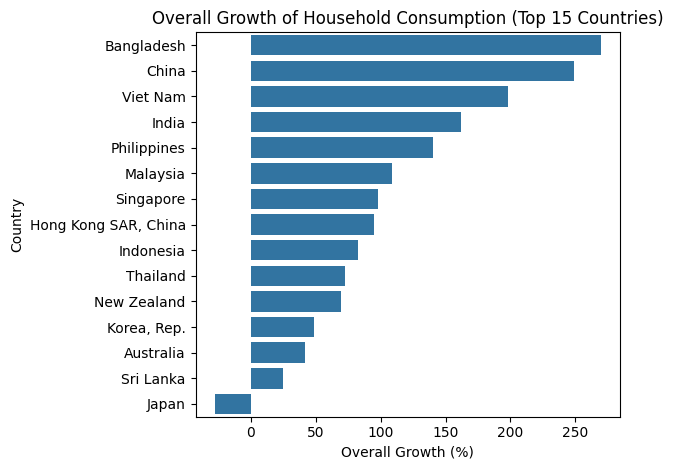

In [23]:
#line plot
plt.figure()
sns.barplot(data=df_growthtop.sort_values("Overall_Growth_%", ascending=False),
            x="Overall_Growth_%", y="Country Name")
plt.title("Overall Growth of Household Consumption (Top 15 Countries)")
plt.ylabel("Country")
plt.xlabel("Overall Growth (%)")
plt.tight_layout()
plt.show()

###**Overall Growth of Household Consumption Expenditure**

The plot compares the growth rate of household consumption expenditure between top 15 countries in the APAC region. Interestingly, Bangladesh displayed the highest growth rate, outperforming China, plausibly due to its recent year of rapid expansion in middle and affluent class. Its robust economic expansion with its average GDP growth of recent years surpasses regional peers (Munir et al., 2023). Key factors such as expansion of domestic manufacturing and service sectors, particularly the garment sector, and increasing jobs enables more people to gain employment and thus more households can spend on daily necessities, consumer goods and services. Besides, a dominance of ASEAN countries in the household consumption growth rankings was observed. This is consistent with the findings of Chang and Kamarudin (2025), highlighted that ASEAN economics were able to sustain growth through 2025 despite challenges such as shifting tariff regimes. The resilience was primarily supported by stable domestic demand and industrial activity, which explains the strong growth in household consumption among ASEAN countries. Slower growth in consumption growth is observed with more advanced economies such as Korea and Australia which can be caused by several factors including slower population growth and ageing demographics (Centre for Population at Treasury, 2025). Notably, Japan is the only country that exhibited negative growth, indicating a declining pattern of household consumption expenditure over the study period. The contraction observed was confirmed by evidence reporting persistent weakness in household expenditure (Reuters, 2025). Despite with the salary hikes, Japan still struggled to keep pace with its inflation rate, making a decline in real wages, thus a reduction in purchasing power (Lim, 2025).

**References:**

Centre for Population at Treasury. (2025, April 15). *Profile of Australia’s population.* Australian Institute of Health and Welfare. https://www.aihw.gov.au/reports/australias-welfare/profile-of-australias-population

Chang, A. & Kamarudin, K. (2025, December 12). *Southeast Asia quarterly economic review: Markets reshape*. McKinsey & Company. https://www.mckinsey.com/featured-insights/future-of-asia/southeast-asia-quarterly-economic-review

Jie, L. H. (2025, July 7). *Tariffs, declining real wages, slowing growth: Japan’s central bank has its work cut out.* CNBC. https://www.cnbc.com/2025/07/08/tariffs-wages-intrest-rates-boj.html

Munir, Z., Chakraborty, S., & Ishtiaque, T. (2023, April 28). *Bangladesh’s economy is growing, and so are its emerging champions.* BCG Global. https://www.bcg.com/publications/2023/bangladesh-grows-economy-with-emerging-champions

Reuters. (2025, December 5). *Japan October household spending falls at fastest pace in nearly 2 years*. Reuters. https://www.reuters.com/world/asia-pacific/japan-october-household-spending-unexpectedly-falls-30-yearyear-2025-12-04/


#**4.0 Conclusion**

The study shows that household consumption expenditure in the APAC region is highly disproportionate, with most expenditures concentrated in a few large economies. China dominated the total household consumption expenditures due to its population scale, rising disposable income, and supportive government policies, making it a critical market for FMCG players. In contrast, consumption growth in advanced economies such as Japan, Australia and Korea remained low, attributed to ageing populations and inflationary pressures.

Additionally, ASEAN and South Asia economies, namely Bangladesh, Indonesia, Vietnam and Malaysia, are the emerging drivers for FMCG market demand. Expansion in middle-income populations, strong post-COVID rebound, and resilient domestic demand have led to faster household consumption growth, even with lower expenditure levels. The base effects and rapid income growth resulted in an exceptionally high growth for Bangladesh, which signals a strong potential for mass market FMCG categories.

Distribution pattern of HFCE across APAC countries further supports the non-uniform consumption growth within market segments. This implies that market prioritization for FMCG companies should be based on both consumption scale and growth momentum. High-income small market countries like Singapore provide stable yet limited volume, whereas larger emerging economies proffer opportunities for volume expansion and category penetration. Overall, findings suggest that emerging, middle-income countries exhibit a greater potential for FMCG growth. While China and India remain indispensable, market players should look into the high expenditure growth ASEAN and South Asia markets for long-term growth.